# Task #1: Prediction using Supervised ML
## Predicting the score of an student based on the number of study hours.
## Name of the intern: Souha Ghabri

### Let's start by importing the necessay libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Now Loading data in DataFrame

In [20]:
df = pd.read_csv("http://bit.ly/w-data")
df.shape


(25, 2)

In [21]:
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [23]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Let's visualize the data 

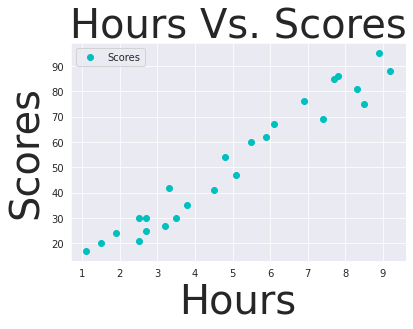

In [24]:
sns.set_style('darkgrid')

plt.plot(df['Hours'],df['Scores'],'oc')
plt.xlabel('Hours',fontsize = 40)
plt.ylabel('Scores',fontsize = 40)
plt.title('Hours Vs. Scores',fontsize = 40)
plt.legend(['Scores']);

### Here's a boxplot of our data

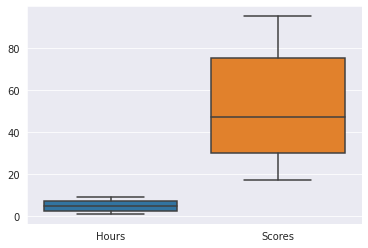

In [25]:
sns.boxplot(data=df[["Hours","Scores"]])

#### We notice that there are no outliers in our data

### And a scatterplot of our data

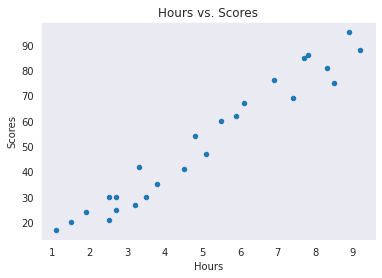

In [26]:
df.plot.scatter(x="Hours",y="Scores")
plt.title("Hours vs. Scores")
plt.grid()
plt.show()

#### Which allows us to clearly see that there is positive linear relationship between the hours and the scores.

### Let's prepare the data

In [27]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

### Let's split our Dataset into Train and Test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.20, random_state = 0)

#### This is done by using 80% of our dataset for training and 20% of the data for testing.

### To train the Algorithm
#### We will use the training data to train our Algorithm

In [29]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("The training is complete.")

The training is complete.


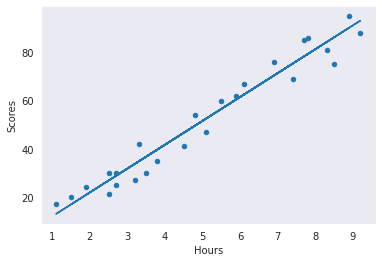

In [30]:
line = regressor.coef_*X+regressor.intercept_

df.plot.scatter(x="Hours",y="Scores")
plt.plot(X, line);
plt.grid()
plt.show()

### Now let's make some Predictions

In [31]:
# Here we are predicting the scores 
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Let's compare the Actual Score vs. Predicted Score

In [32]:
df_compare = pd.DataFrame({"Actual Score":y_test,"Predicted Score":y_pred})
df_compare

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Here we are need to predict the score in the case which a student studies for 9.25 hours per day

In [33]:
my_hours = np.array([[9.25]])
my_pred = regressor.predict(my_hours)
print("No of Hours = {}".format(my_hours[0][0]))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


###Last step is evaluating the Model 

In [34]:
import sklearn.metrics as metrics

explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)

print('Explained Variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Explained Variance:  0.9483
mean_squared_log_error:  0.0185
r2:  0.9455
MAE:  4.1839
MSE:  21.5988
RMSE:  4.6474
